In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import text 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sowmyasrinivasan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sowmyasrinivasan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sowmyasrinivasan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# slim = pd.read_csv('slim.csv')
character = pd.read_csv('data/fixed_characters.csv')
stemmed = pd.read_csv('data/final.csv')
stemmed = stemmed.fillna('')

In [3]:
sw = stopwords.words('english')
names = character.name.str.lower().to_list()
sw.extend(names)
# slimmer = slim[slim['gender'] != 2]

In [4]:
# stop_words = text.ENGLISH_STOP_WORDS.union(names)

In [5]:
# female = slimmer[slimmer['gender'] == 1]
# male = slimmer[slimmer['gender'] == 0]

In [6]:
# m_test = male.sample(n=len(female))

In [7]:
# test = female.append(m_test)

#### testing on one

In [8]:
def split(x):
    if "'" in x:
        y = x.split("'")[0]
    else:
        y = x
    return y

In [9]:
t = "she's they're on knowledge's door"
tknzr = TweetTokenizer()
text_tokens = tknzr.tokenize(t)
text_tokens = [split(x) for x in text_tokens]
tokens_without_sw = [word for word in text_tokens if not word in sw]

In [10]:
porter_stemmer = PorterStemmer()
words = [porter_stemmer.stem(word) for word in tokens_without_sw]

In [11]:
lemma = nltk.WordNetLemmatizer()

In [12]:
description = [lemma.lemmatize(word) for word in tokens_without_sw]

In [13]:
description

['knowledge', 'door']

#### testing on all

In [14]:
# dialogue = []
# for x in slimmer.dialogue:
#     tknzr = TweetTokenizer()
#     text_tokens = tknzr.tokenize(x)
#     description = [lemma.lemmatize(word) for word in text_tokens]
#     description = " ".join(description)
#     dialogue.append(description)

In [15]:
dialogue = stemmed.dialogue.to_list()
vec = CountVectorizer(max_features = 1000)
vecf = vec.fit(dialogue)

In [16]:
vector = vecf.transform(dialogue).toarray()

In [17]:
x = vector

In [18]:
# print("{} most common words: {}".format(max_features,count_vectorizer.get_feature_names()))

In [19]:
y = stemmed.iloc[:,1].values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [22]:
nb = BernoulliNB()
nb.fit(x_train,y_train)
print("accuracy: ",nb.score(x_test,y_test))

accuracy:  0.5559136515658255


In [23]:
y_pred = nb.predict(x_test)

In [24]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
import numpy as np
unique, counts = np.unique(y_pred, return_counts=True)
unique, counts

(array([0, 1]), array([ 6081, 10364]))

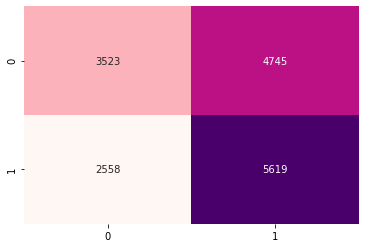

<Figure size 432x288 with 0 Axes>

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test,y_pred)

sns.heatmap(cm_rf,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()
plt.savefig('confusion.png')

#### test predictor

In [32]:
t = "i'm fucking to cry"
tknzr = TweetTokenizer()
text_tokens = tknzr.tokenize(t)
text_tokens = [split(x) for x in text_tokens]
tokens_without_sw = [word for word in text_tokens if not word in sw]
description = [lemma.lemmatize(word) for word in tokens_without_sw]
words = " ".join(description)
words = [words]
words

['fucking cry']

In [33]:
test_x = vecf.transform(words).toarray()

In [34]:
len(test_x[0])

1000

In [35]:
test_y = nb.predict(test_x)

In [36]:
test_y[0]

0

In [140]:
def init():
    stemmed = pd.read_csv('stemmed.csv')
    stemmed = stemmed.fillna('')
    
    dialogue = slimmer.dialogue.to_list()
    vec = CountVectorizer(max_features = 1000)
    vecf = vec.fit(dialogue)
    
    vector = vecf.transform(dialogue).toarray()
    x = vector
    y = slimmer.iloc[:,1].values
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)
    
    nb = MultinomialNB()
    nb.fit(x_train,y_train)
    return nb

In [143]:
def predict_gender(t):
    nb = init()
    
    tknzr = TweetTokenizer()
    text_tokens = tknzr.tokenize(t)
    text_tokens = [split(x) for x in text_tokens]
    tokens_without_sw = [word for word in text_tokens if not word in sw]
    description = [lemma.lemmatize(word) for word in tokens_without_sw]
    words = " ".join(description)
    words = [words]
    
    test_x = vecf.transform(words).toarray()
    test_y = nb.predict(test_x)
    if test_y[0] == 0:
        gender = 'Male'
    else:
        gender = 'Female'
    return gender

In [142]:
predict_gender('why would you say that to me you asshole')

'Male'